In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from IPython.display import clear_output, display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from importlib import reload

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import scoobpsf
from scoobpsf.math_module import xp, _scipy
from scoobpsf.imshows import *
from scoobpsf import scoobi

import lina

lina.math_module.update_np(np)
lina.math_module.update_scipy(scipy)

pupil_diam = 6.75*u.mm
wavelength_c = 632.8e-9*u.m

this worked
Succesfully initialized testbed interface.


# Initialize the testbed interface with a given DM channel.

this worked
Succesfully initialized testbed interface.


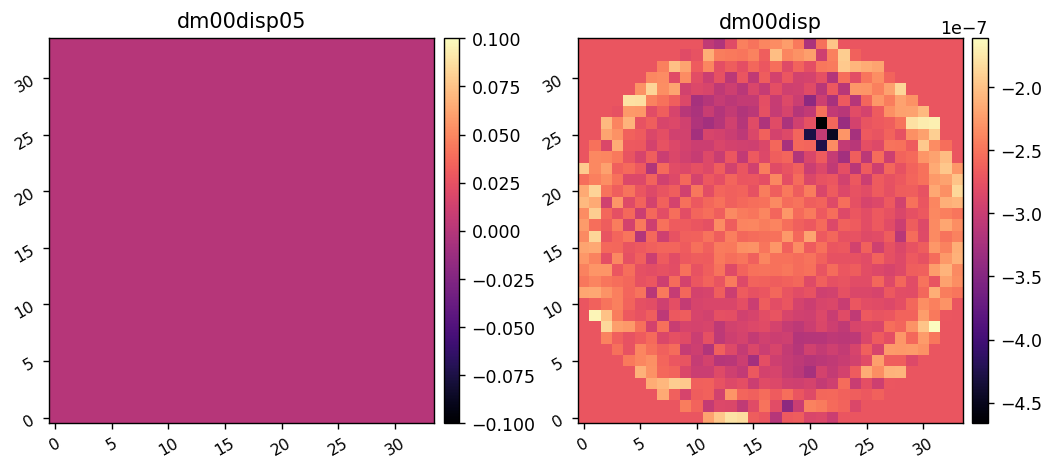

In [2]:
reload(scoobi)
tbi = scoobi.SCOOBI(dm_channel='dm00disp05', nims=5)
tbi.reset_dm()
tbi.show_dm()

In [6]:
tbi.texp = 0.0005

# Set the ROI to the desired location. 

Note that setting the ROI resets the exposure time so reassign the desired value for that. 


In [8]:
scoobi.set_roi(5050,3050, 512)
tbi.texp = 0.0005

# Move the PSF to the desired location within the ROI. This only perform relative movements.

In [22]:
scoobi.move_psf(-2,0)

# Snap and image and display it.

In [ ]:
# tbi.x_shift = 10
# tbi.texp = 0.0005
# tbi.npsf = 256
image = tbi.snap(plot=True)
imshow1(image, lognorm=True)

texp0 = tbi.texp
ref_max0 = np.max(image)


INFO:utils:Got semaphore index -1.


# Now try a couple of DM commands to make sure the system pixelscale is calibrated.

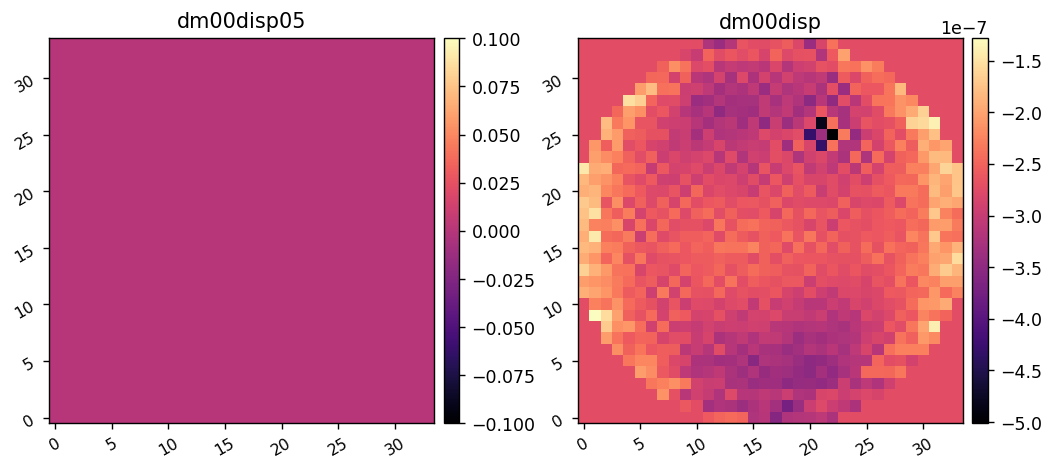

In [24]:
tbi.show_dm()

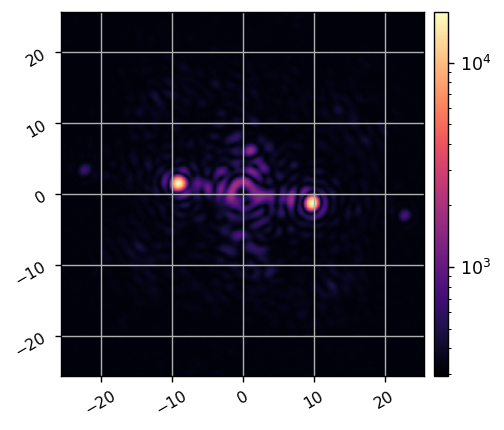

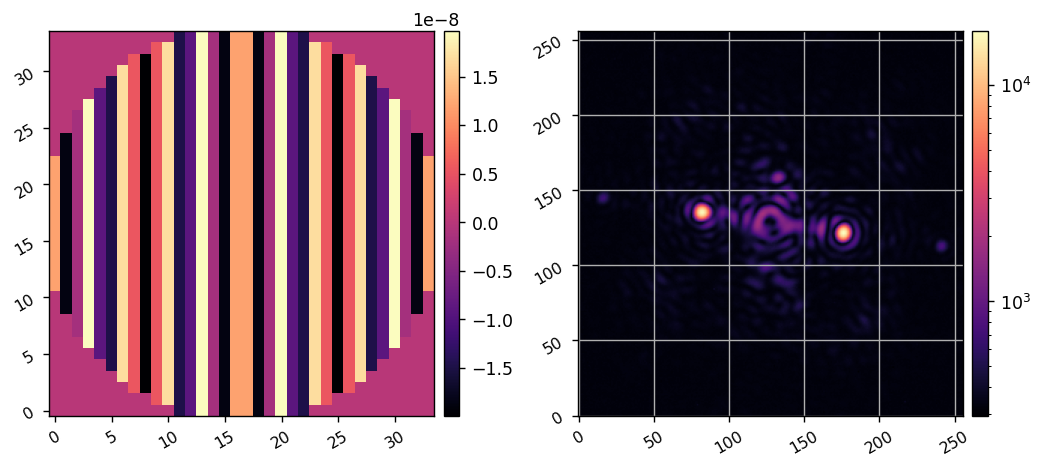

In [16]:
xpp = np.linspace(-tbi.Nact/2, tbi.Nact/2-1, tbi.Nact) + 1/2
ppx, ppy = np.meshgrid(xpp,xpp)

amp = 2e-8

x_sep = 10
y_sep = 0
command = amp*np.cos(2*np.pi*ppx*x_sep/tbi.Nact + 2*np.pi*ppy*y_sep/tbi.Nact)*tbi.dm_mask

tbi.set_dm(command)
im = tbi.snap(plot=True)
imshow2(tbi.get_dm(), im, lognorm2=True, grid2=True)

tbi.reset_dm()

In [ ]:
xpp = np.linspace(-tbi.Nact/2, tbi.Nact/2-1, tbi.Nact) + 1/2
ppx, ppy = np.meshgrid(xpp,xpp)

amp = 2e-8

x_sep = 10
y_sep = 0
command = amp*np.cos(2*np.pi*ppx*x_sep/tbi.Nact + 2*np.pi*ppy*y_sep/tbi.Nact)*tbi.dm_mask

tbi.set_dm(command)
im = tbi.snap(plot=True)
imshow2(tbi.get_dm(), im, lognorm2=True, grid2=True)

tbi.reset_dm()

# Now try finding the VVC

This shit sucks if you didn't know where it was to begin with

In [60]:
# where Kyle thought the VVC should be, the fold mirror is potentially blocking me
scoobi.set_roi(1700, 3000, 512)
tbi.texp = 0.002

In [164]:
scoobi.set_roi(2345,3100, 1024)
tbi.texp = 0.005

In [64]:
tbi.texp = 0.0001

In [66]:
scoobi.move_psf(0, 100)

In [34]:
scoobi.move_psf(-200, 0)
# im = tbi.snap(plot=True)

In [56]:
scoobi.move_psf(1,0)

In [49]:
scoobi.move_psf(-1,0)

In [54]:
scoobi.move_psf(0,1)

In [42]:
scoobi.move_psf(0,-1)

In [50]:
import scoobpy
from scoobpy import utils
from purepyindi import INDIClient, SwitchState

client = INDIClient('localhost', 7624)
client.start()

In [52]:
client['stagepiezo.stagefold_pos.current'] = 1000

In [43]:
reload(scoobi)
scoobi.move_fold(200000)

this worked
Succesfully initialized testbed interface.


KeyError: 'Unknown device stagepiezo'